<a href="https://colab.research.google.com/github/avi78/Handwritten_digits_recognition/blob/main/AI_ML_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Import pytorch
import torch

#  Adding Torch functionalities so that it can be used for building CNN Model
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

import torch.utils.data as data_utils

In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [29]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available. Using the GPU...")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using the CPU...")

GPU is not available. Using the CPU...


In [30]:
#Reading data into pandas dataframe.

data_sets = "/content/drive/MyDrive/TMNIST_Data.csv"
data = pd.read_csv(data_sets)

In [31]:
# Displaying first rows of dataset
data.head()

,names,labels,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,GrandHotel-Regular,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,EncodeSansCondensed-Medium,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Varela-Regular,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ArefRuqaa-Bold,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,KulimPark-Regular,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Determining Shape and Number of Sample in the Dataset

print(f"The Shape of the Dataframe is: {data.shape}") #Number of Samples, Number of Pixels(Features)
print(f"Number of Samples in the Dataset: {data.shape[0]}")

The Shape of the Dataframe is: (29900, 786)
Number of Samples in the Dataset: 29900


In [33]:
# Number of unique character in the Dataset
print(f"Number of unique characters present in the Dataset: {len(data.labels.unique())}")

Number of unique characters present in the Dataset: 10


In [34]:
# Label distribution
data.labels.value_counts()

2    2990
8    2990
4    2990
3    2990
1    2990
6    2990
5    2990
9    2990
7    2990
0    2990
Name: labels, dtype: int64

In [35]:
#Dropping redundant coloums like names and labels from the training frames and keeping only pixel values
X = data.drop(columns = {'names', 'labels'})/255
X = X.values.reshape(X.shape[0], 1, 28, 28)
y = data[['labels']].values.reshape((-1,))

In [36]:
#split data into training and testing sets using the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# Convert X_train, X_test, y_train, and y_test to PyTorch tensors
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [38]:
#printing shape
print(X_train.shape, y_train.shape)

torch.Size([23920, 1, 28, 28]) torch.Size([23920])


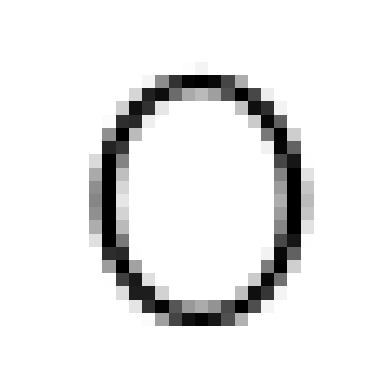

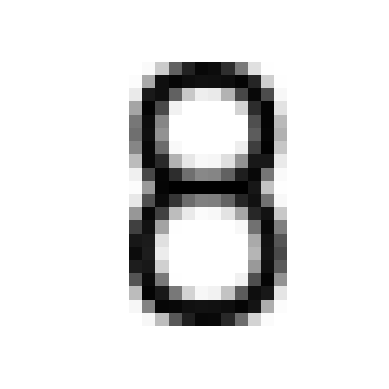

In [39]:
def visualize_image(data):

    # Display the image using matplotlib's imshow() function
    plt.imshow(data[0], cmap='gray_r')

    # Turn off the axis display in the plot
    plt.axis("off")

    # Show the plot with the displayed image
    plt.show()

# Call the visualize_image() function with the first image in X_train dataset
visualize_image(X_train[1])
visualize_image(X_train[2])

In [40]:
print(type(X_train))
print(type(y_train))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [41]:
# Create a training dataset from X_train and y_train
train = data_utils.TensorDataset(X_train, y_train)
# Create a testing dataset from X_test and y_test
test = data_utils.TensorDataset(X_test, y_test)

In [42]:
# Create a training data loader from the train dataset
# with a batch size of 128 and shuffling the data
train_loader = data_utils.DataLoader(train, batch_size=128, shuffle=True)

# Create a testing data loader from the test dataset
# with a batch size of 128 and shuffling the data
test_loader = data_utils.DataLoader(test, batch_size=128, shuffle=True)

In [43]:
#Printing input size of an iteration of training
for images, labels in train_loader:
    print(images.shape, labels.shape)

data_iter = iter(train_loader)
images, labels = next(data_iter)
print(images.shape, labels.shape)

torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([128, 1, 28, 28]) torch.Size([128])
torch.Size([1

In [44]:
# Checking the size of the batch and labels from the training data loader
for images, labels in train_loader:
    print("Batch size (images):", images.shape)
    print("Batch size (labels):", labels.shape)
    break  # After printing the first batch, we break out of the loop

# Alternatively, we can directly fetch one batch from the data loader
data_iter = iter(train_loader)
images, labels = next(data_iter)
print("Directly fetched batch - images:", images.shape)
print("Directly fetched batch - labels:", labels.shape)

Batch size (images): torch.Size([128, 1, 28, 28])
Batch size (labels): torch.Size([128])
Directly fetched batch - images: torch.Size([128, 1, 28, 28])
Directly fetched batch - labels: torch.Size([128])


In [45]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)     # First convolutional layer with input channels=1, output channels=32, and kernel size=3x3
        self.conv2 = nn.Conv2d(32, 64, 3)    # Second convolutional layer with input channels=32, output channels=64, and kernel size=3x3
        self.pool = nn.MaxPool2d(2, 2)       # Max pooling layer with kernel size=2x2 and stride=2
        self.fc1 = nn.Linear(64 * 12 * 12, 128)  # Fully connected layer with input size of 64x12x12 (output from previous layers) and output size of 128
        self.fc2 = nn.Linear(128, 10)        # Fully connected layer with input size of 128 and output size of 10 (for 10 classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))            # Apply ReLU activation to the output of the first convolutional layer
        x = self.pool(F.relu(self.conv2(x))) # Apply ReLU activation to the output of the second convolutional layer, then perform max pooling
        x = x.view(-1, 64 * 12 * 12)         # Flatten the tensor to a 1D vector
        x = F.relu(self.fc1(x))              # Apply ReLU activation to the output of the first fully connected layer
        x = self.fc2(x)                      # Output from the second fully connected layer (logits)
        return x

net = Net()                               # Create an instance of the neural network model
net.to(device)                           # Move the model to the specified device (e.g., GPU or CPU)


Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [46]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)
optimizer = optim.Adam(net.parameters(), lr = 0.001)

In [47]:
net = net.float()

In [48]:
epoch_num = 0
actual_loss = 0.0
accuracy = 0.0

In [49]:
#training model with 30 epochs

num_epochs = 30

# Create lists to store epoch number, loss, and accuracy for each epoch
epoch_log = []
loss_log = []
accuracy_log = []

for epoch in range(num_epochs):
    print(f'Starting Epoch: {epoch + 1}...')

    running_loss = 0.0   # Initialize running loss to 0 for each epoch

    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)    # Move inputs to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)    # Move labels to the specified device

        optimizer.zero_grad()        # Zero the gradients of the optimizer

        outputs = net(inputs.float())   # Forward pass to get predicted outputs from the model
        loss = criterion(outputs,labels)  # Compute the loss between predicted outputs and ground truth labels
        loss.backward()                 # Backward pass to compute gradients
        optimizer.step()                # Update model weights using the optimizer

        running_loss += loss.item()   # Add the current batch loss to the running loss for this epoch
        if i % 50 == 49:
            correct = 0
            total = 0

            with torch.no_grad():
                for data in test_loader:
                    images, labels = data
                    images = images.to(device)    # Move images to the specified device
                    labels = labels.to(device)    # Move labels to the specified device
                    outputs = net(images.float())  # Forward pass to get predicted outputs from the model

                    _, predicted = torch.max(outputs.data, dim = 1)   # Get predicted labels with maximum probability
                    total += labels.size(0)   # Update total number of images
                    correct += (predicted == labels).sum().item()   # Update correct predictions count

                accuracy = 100 * correct / total   # Calculate accuracy for this epoch
                actual_loss = running_loss / 50   # Calculate average loss for this epoch
                epoch_num = epoch + 1   # Get current epoch number
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i + 1)}, Loss: {actual_loss:.3f}, Test Accuracy: {accuracy:.3f}%')

    epoch_log.append(epoch_num)   # Append epoch number to the epoch log
    loss_log.append(actual_loss)   # Append average loss to the loss log
    accuracy_log.append(accuracy)   # Append accuracy to the accuracy log


print('Training Completed.')


Starting Epoch: 1...
Epoch: 1, Mini-Batches Completed: 50, Loss: 0.592, Test Accuracy: 94.498%
Epoch: 1, Mini-Batches Completed: 100, Loss: 0.740, Test Accuracy: 95.886%
Epoch: 1, Mini-Batches Completed: 150, Loss: 0.858, Test Accuracy: 97.258%
Starting Epoch: 2...
Epoch: 2, Mini-Batches Completed: 50, Loss: 0.061, Test Accuracy: 98.344%
Epoch: 2, Mini-Batches Completed: 100, Loss: 0.109, Test Accuracy: 98.428%
Epoch: 2, Mini-Batches Completed: 150, Loss: 0.168, Test Accuracy: 98.579%
Starting Epoch: 3...
Epoch: 3, Mini-Batches Completed: 50, Loss: 0.036, Test Accuracy: 98.294%
Epoch: 3, Mini-Batches Completed: 100, Loss: 0.073, Test Accuracy: 98.863%
Epoch: 3, Mini-Batches Completed: 150, Loss: 0.102, Test Accuracy: 98.395%
Starting Epoch: 4...
Epoch: 4, Mini-Batches Completed: 50, Loss: 0.022, Test Accuracy: 98.913%
Epoch: 4, Mini-Batches Completed: 100, Loss: 0.047, Test Accuracy: 98.763%
Epoch: 4, Mini-Batches Completed: 150, Loss: 0.072, Test Accuracy: 98.963%
Starting Epoch: 5...

In [50]:
PATH = './cnn_net.pth'
torch.save(net.state_dict(), PATH)

In [51]:
net = Net()
net.to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [52]:
correct = 0   # Initialize count of correct predictions to 0
total = 0     # Initialize count of total predictions to 0

with torch.no_grad():   # Disable gradient computation for efficiency
    for data in test_loader:   # Loop through the test dataset
        images, labels = data   # Get images and labels from the test dataset
        images = images.to(device)   # Move images to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)   # Move labels to the specified device
        outputs = net(images.float())   # Forward pass to get predicted outputs from the model
        _, predicted = torch.max(outputs.data, 1)   # Get predicted labels with maximum probability
        label_size = labels.size(0)   # Get the number of labels in the current batch
        total += label_size   # Update total count of predictions
        correct += (predicted == labels).sum().item()   # Update count of correct predictions by summing up correct predictions in the current batch

accuracy = 100 * correct / total   # Calculate accuracy by dividing correct predictions by total predictions and multiplying by 100 to get percentage

print(f'Accuracy of the network on test images: {accuracy:.3}%')

Accuracy of the network on test images: 99.3%


Actual Label: 5, Predicted Label: 5


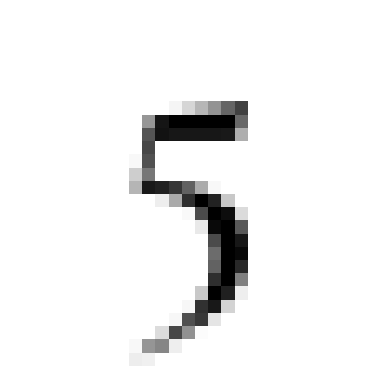

Actual Label: 3, Predicted Label: 3


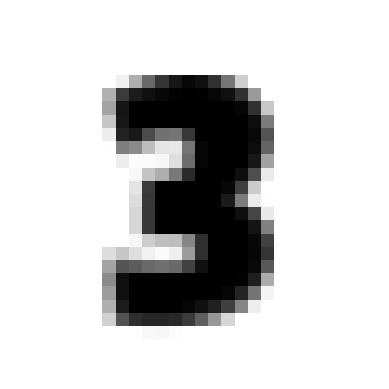

Actual Label: 6, Predicted Label: 6


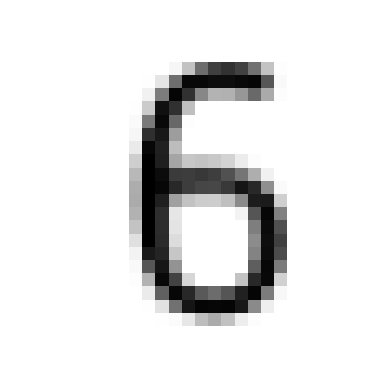

Actual Label: 2, Predicted Label: 2


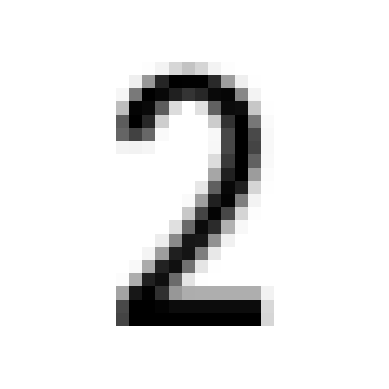

Actual Label: 3, Predicted Label: 3


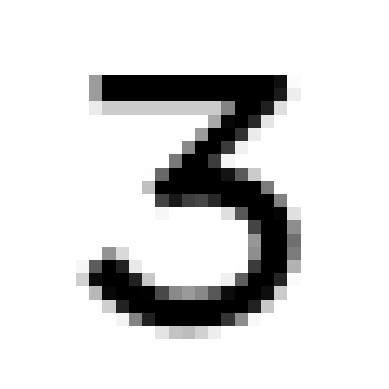

Actual Label: 6, Predicted Label: 6


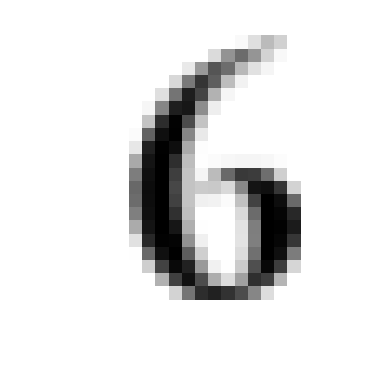

Actual Label: 5, Predicted Label: 5


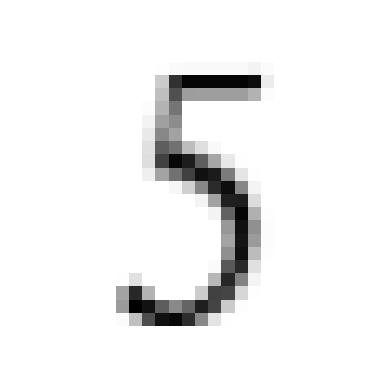

In [53]:
net.eval()   # Set the model to evaluation mode, which disables dropout and batch normalization

num_images = 7  # Number of images to visualize

with torch.no_grad():   # Disable gradient computation for efficiency
    for data in test_loader:   # Loop through the test dataset
        images, labels = data   # Get images and labels from the test dataset
        images = images.to(device)   # Move images to the specified device (e.g., GPU or CPU)
        labels = labels.to(device)   # Move labels to the specified device

        outputs = net(images.float())   # Forward pass to get predicted outputs from the model
        predictions = torch.argmax(outputs, dim=1)   # Get predicted labels with maximum probability

        for i in range(data[0].shape[0]):   # Loop through the images in the current batch
            pred = predictions[i].item()   # Get the predicted label for the current image
            label = labels[i]   # Get the actual label for the current image
            if(num_images > 0):   # Check if the number of images to visualize is greater than 0
                print(f'Actual Label: {pred}, Predicted Label: {label}')   # Print the actual and predicted label for the current image
                img = np.reshape(images[i].cpu().numpy(),[1,28,28])   # Convert the image tensor to a NumPy array and reshape it to [1, 28, 28] size
                visualize_image(img)   # Visualize the image using a custom function (e.g., visualize_image)
                num_images -= 1   # Decrement the number of images to visualize by 1


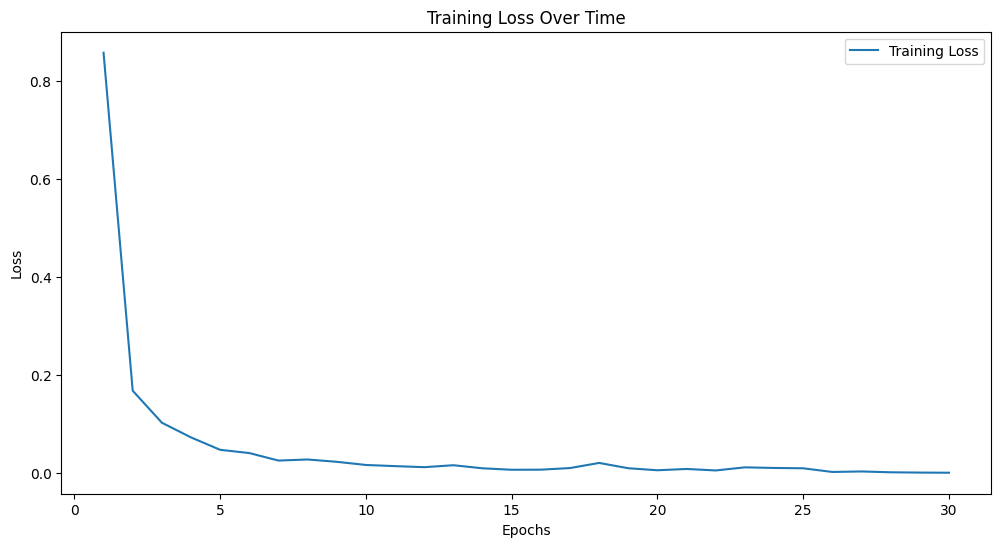

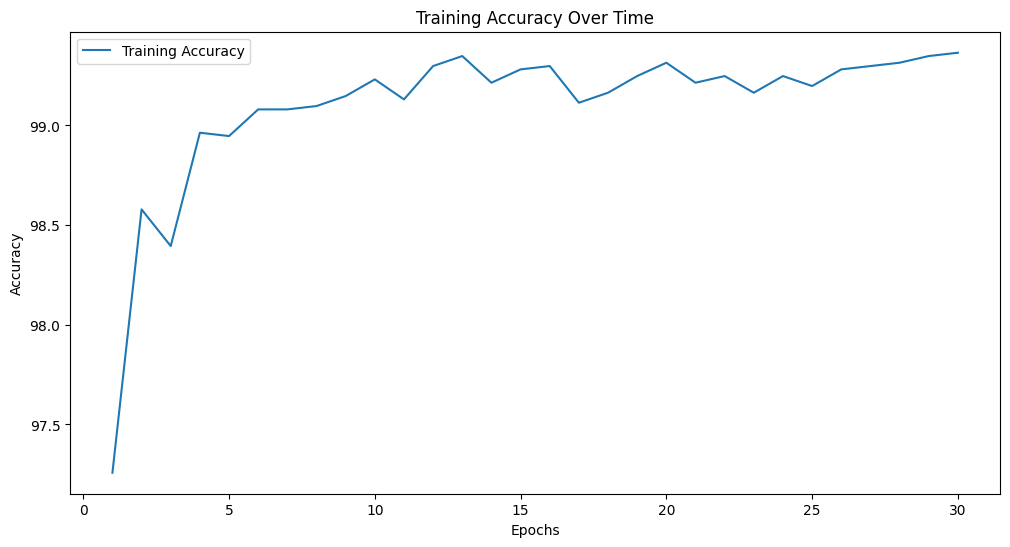

In [54]:
import matplotlib.pyplot as plt

# Plotting the training loss
plt.figure(figsize=(12, 6))
plt.plot(epoch_log, loss_log, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

# Plotting the training accuracy
plt.figure(figsize=(12, 6))
plt.plot(epoch_log, accuracy_log, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Time')
plt.legend()
plt.show()

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
pred_list = torch.zeros(0, dtype=torch.long, device='cpu')   # Create an empty tensor to store predicted labels with dtype long and device CPU
label_list = torch.zeros(0, dtype=torch.long, device='cpu')   # Create an empty tensor to store actual labels with dtype long and device CPU

with torch.no_grad():   # Turn off gradient computation during inference
    for i, (inputs, classes) in enumerate(test_loader):   # Iterate over the test data loader
        inputs = inputs.to(device)   # Move inputs to the specified device (e.g., CPU or GPU)
        classes = classes.to(device)   # Move actual labels to the specified device
        outputs = net(inputs.float())   # Pass inputs through the network to get predicted outputs
        _, preds = torch.max(outputs, 1)   # Get the predicted labels by finding the indices of maximum values along the second dimension (class probabilities)

        pred_list = torch.cat([pred_list, preds.view(-1).cpu()])   # Concatenate predicted labels to the pred_list tensor, reshaping to 1D and moving to CPU
        label_list = torch.cat([label_list, classes.view(-1).cpu()])   # Concatenate actual labels to the label_list tensor, reshaping to 1D and moving to CPU

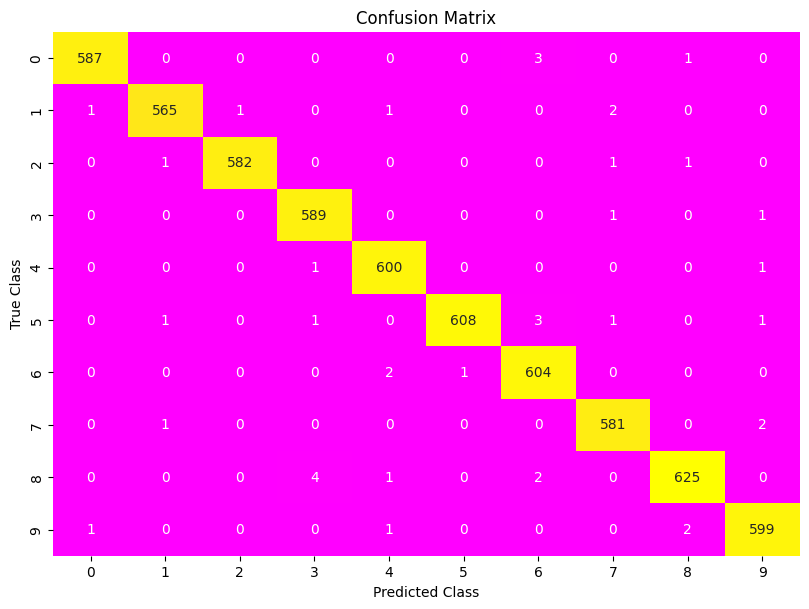

In [56]:
conf_mat = confusion_matrix(label_list.numpy(), pred_list.numpy())   # Compute the confusion matrix using predicted and actual labels converted to NumPy arrays
class_names = (0, 1, 2, 3, 4, 5, 6, 7, 8, 9)   # Define the class names as a tuple of integers from 0 to 9
dataframe = pd.DataFrame(conf_mat, index=class_names, columns=class_names)   # Create a DataFrame from the confusion matrix, with class names as row and column indices
#plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dataframe, annot=True, cbar=None,cmap="spring",fmt="d")

plt.title("Confusion Matrix"), plt.tight_layout()

plt.ylabel("True Class"),
plt.xlabel("Predicted Class")
plt.show()

In [57]:
from sklearn.metrics import precision_score, accuracy_score, f1_score, recall_score

# Compute precision, accuracy, F1 score, and recall
precision = precision_score(label_list.numpy(), pred_list.numpy(), average='weighted')
accuracy = accuracy_score(label_list.numpy(), pred_list.numpy())
f1 = f1_score(label_list.numpy(), pred_list.numpy(), average='weighted')
recall = recall_score(label_list.numpy(), pred_list.numpy(), average='weighted')

# Print the metrics
print(f'Precision: {precision:.3f}')
print(f'Accuracy: {accuracy:.3f}')
print(f'F1 Score: {f1:.3f}')
print(f'Recall: {recall:.3f}')


Precision: 0.993
Accuracy: 0.993
F1 Score: 0.993
Recall: 0.993


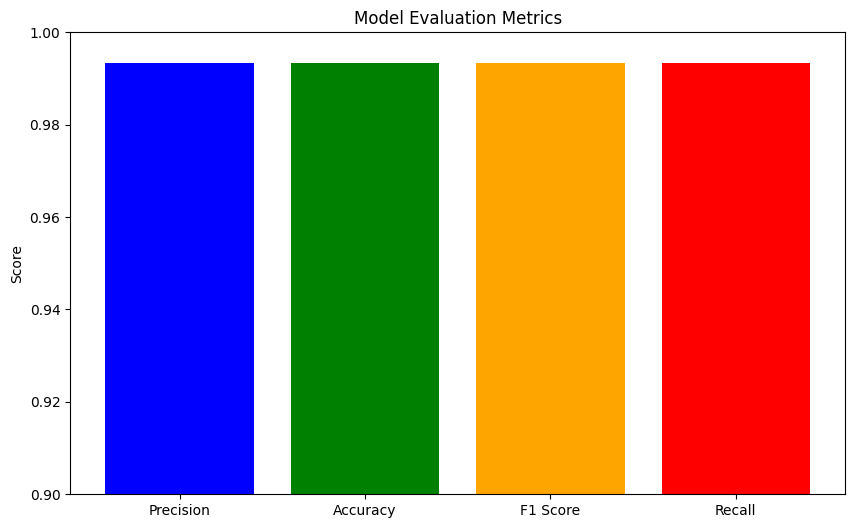

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# ... (your existing code)

# Compute precision, accuracy, F1 score, and recall
precision = precision_score(label_list.numpy(), pred_list.numpy(), average='weighted')
accuracy = accuracy_score(label_list.numpy(), pred_list.numpy())
f1 = f1_score(label_list.numpy(), pred_list.numpy(), average='weighted')
recall = recall_score(label_list.numpy(), pred_list.numpy(), average='weighted')

# Plot the metrics
metrics_names = ['Precision', 'Accuracy', 'F1 Score', 'Recall']
metrics_values = [precision, accuracy, f1, recall]

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.title('Model Evaluation Metrics')
plt.ylabel('Score')
plt.ylim(0.9, 1.0)  # Adjust the y-axis limits based on your metric values
plt.show()


In [59]:
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self, activation_function='relu'):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 10)

        # Choose activation function based on the provided parameter
        if activation_function == 'relu':
            self.activation = F.relu
        elif activation_function == 'leaky_relu':
            self.activation = F.leaky_relu
        elif activation_function == 'elu':
            self.activation = F.elu
        elif activation_function == 'sigmoid':
            self.activation = torch.sigmoid
        elif activation_function == 'tanh':
            self.activation = torch.tanh
        elif activation_function == 'linear':
            self.activation = lambda x: x  # Linear activation, no activation function
        else:
            raise ValueError(f"Unsupported activation function: {activation_function}")

    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool(self.activation(self.conv2(x)))
        x = x.view(-1, 64 * 12 * 12)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x


In [60]:
# Example with ReLU activation function
net_relu = Net(activation_function='relu')

# Example with Sigmoid activation function
net_sigmoid = Net(activation_function='sigmoid')


In [61]:
import torch.optim as optim

# List of activation functions to try
activation_functions = ['relu', 'leaky_relu', 'elu', 'sigmoid', 'tanh', 'linear']

# Number of epochs
num_epochs = 10

# Create lists to store results
results = []

for activation_function in activation_functions:
    # Create an instance of the neural network model with the specified activation function
    net = Net(activation_function=activation_function)
    net.to(device)

    # Choose optimizer and criterion
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    # Create lists to store epoch number, loss, and accuracy for each epoch
    epoch_log = []
    loss_log = []
    accuracy_log = []

    for epoch in range(num_epochs):
        print(f'Starting Epoch {epoch + 1} with {activation_function} activation...')

        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = net(inputs.float())
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if i % 50 == 49:
                correct = 0
                total = 0

                with torch.no_grad():
                    for data in test_loader:
                        images, labels = data
                        images = images.to(device)
                        labels = labels.to(device)
                        outputs = net(images.float())

                        _, predicted = torch.max(outputs.data, dim=1)
                        total += labels.size(0)
                        correct += (predicted == labels).sum().item()

                    accuracy = 100 * correct / total
                    actual_loss = running_loss / 50
                    epoch_num = epoch + 1

                    epoch_log.append(epoch_num)
                    loss_log.append(actual_loss)
                    accuracy_log.append(accuracy)

    results.append({
        'activation_function': activation_function,
        'epochs': epoch_log,
        'loss': loss_log,
        'accuracy': accuracy_log
    })

# Print or analyze the results as needed
for result in results:
    print(f"Activation Function: {result['activation_function']}")
    print(f"Epochs: {result['epochs']}")
    print(f"Final Loss: {result['loss'][-1]:.3f}")
    print(f"Final Accuracy: {result['accuracy'][-1]:.3f}%")
    print("\n")


Starting Epoch 1 with relu activation...
Starting Epoch 2 with relu activation...
Starting Epoch 3 with relu activation...
Starting Epoch 4 with relu activation...
Starting Epoch 5 with relu activation...
Starting Epoch 6 with relu activation...
Starting Epoch 7 with relu activation...
Starting Epoch 8 with relu activation...
Starting Epoch 9 with relu activation...
Starting Epoch 10 with relu activation...
Starting Epoch 1 with leaky_relu activation...
Starting Epoch 2 with leaky_relu activation...
Starting Epoch 3 with leaky_relu activation...
Starting Epoch 4 with leaky_relu activation...
Starting Epoch 5 with leaky_relu activation...
Starting Epoch 6 with leaky_relu activation...
Starting Epoch 7 with leaky_relu activation...
Starting Epoch 8 with leaky_relu activation...
Starting Epoch 9 with leaky_relu activation...
Starting Epoch 10 with leaky_relu activation...
Starting Epoch 1 with elu activation...
Starting Epoch 2 with elu activation...
Starting Epoch 3 with elu activation..

In [1]:
import matplotlib.pyplot as plt

# Plotting accuracy for each activation function
activation_labels = [result['activation_function'] for result in results]
accuracy_values = [result['accuracy'][-1] for result in results]

plt.figure(figsize=(10, 6))
plt.bar(activation_labels, accuracy_values, color=['blue', 'orange', 'green', 'red', 'purple', 'brown'])
plt.xlabel('Activation Functions')
plt.ylabel('Final Accuracy (%)')
plt.title('Accuracy for Different Activation Functions')
plt.ylim(90, 100)  # Set y-axis limit for better visualization
plt.show()


NameError: name 'results' is not defined